In [1]:
from datasets import load_dataset

sample_data_config = {
    "dataset": "CIFAR10",
    "batch_size": 32,
    "count_sampling": "EXACT",
    "pixel_sampling": "EXACT"
}

train_loader, val_loader, test_loader, image_shape = load_dataset(sample_data_config)

# Partial observations

This notebook showcases types of partial observations

## Count sampling

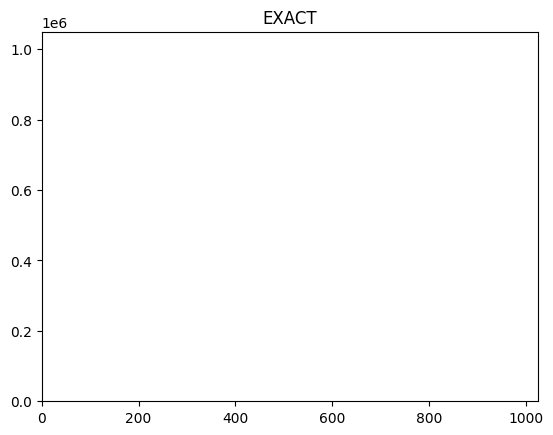

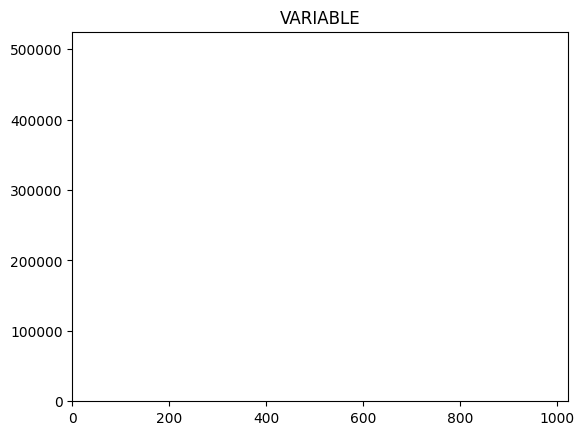

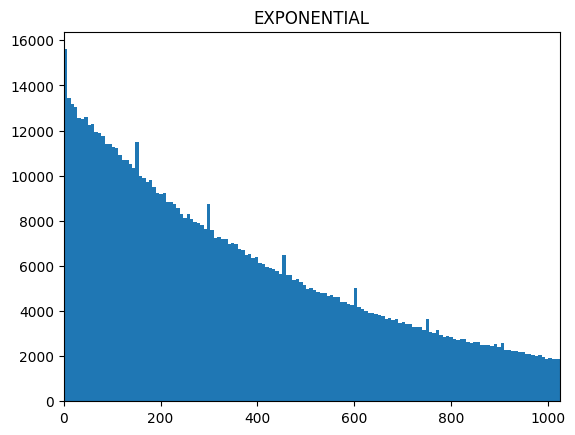

In [9]:
from datasets.observations import CountSamplingMethod
from typing import List
import matplotlib.pyplot as plt

count_sampler_methods : List[CountSamplingMethod] = [
    CountSamplingMethod.EXACT,
    CountSamplingMethod.VARIABLE,
    CountSamplingMethod.EXPONENTIAL
]

#used to get the shape of the image
image = next(iter(train_loader))[0][0]

for sampler_method in count_sampler_methods:
    counts = []
    sampler = sampler_method.get_sampler()

    for i in range(100_0000):
        counts.append(sampler.get_pixel_count(image))

    min_pixel_count = 0
    max_pixel_count = image_shape[1] * image_shape[2]


    #range of pixel counts
    plt.xlim(min_pixel_count, max_pixel_count)
    #number of bins
    plt.hist(counts, bins=max_pixel_count - min_pixel_count)
    plt.title(sampler_method.name)
    plt.show()
    

## Pixel Sampling

Three types of sampling implemented:

* Exact

        * Always the same pixels sampled(also the same count of pixels)

* Uniform

        * Samples given number of pixels from uniform distribution (every pixel has equal probability to be sampled)

* Gaussian

        * Sampls pixels from gaussian distribution where the center is the image center. The default std is image_size / 4. The output is clipped to only sample pixels from this image

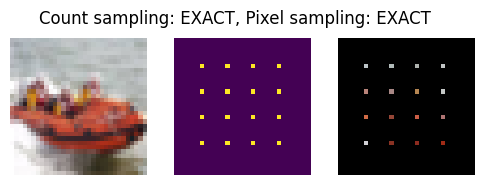

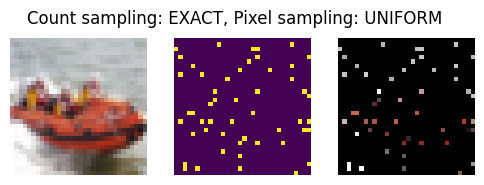

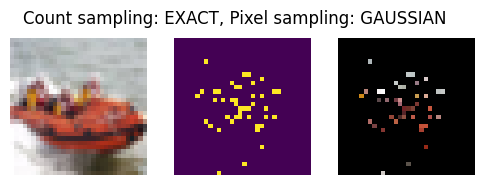

In [2]:
from plotting import plot_conditioned_examples
plot_conditioned_examples(next(iter(train_loader))[0][0])